In [1]:
%%bash
pwd
mkdir -p "./data/outputs"

/home/jordan990301/Projects/HiCPAP/examples


In [2]:
import numpy as np
import pandas as pd
from hicpap import paptools

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
# np.set_printoptions(threshold=50)

In [3]:
### Case 1
kwargs = {
    # "pearson":  "./data/juicer_data/gm12878_1000000_pearson_chr1.txt",
    "pearson":  "/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpap/data_store/data/rao_2014/juicer_outputs/k562/1000000/pearsons/pearson_chr22.txt",
    "zero_mean": True 
}
pearson_np = paptools.read_pearson(**kwargs)

### Case 2
# kwargs = {
#     "hic_path": "https://hicfiles.s3.amazonaws.com/hiseq/gm12878/in-situ/combined.hic",
#     "chrom_x": "1",
#     "chrom_y": "1",
#     "resolution": 1000000,
#     "norm": "KR",
#     "method": "oe",
#     "zero_mean": True 
# }
# pearson_np = paptools.straw_to_pearson(**kwargs)

display(pearson_np)

array([[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.8206, -0.2109, -0.2764],
       [ 0.    ,  0.    ,  0.    , ..., -0.2893,  0.7422, -0.3528],
       [ 0.    ,  0.    ,  0.    , ..., -0.1062, -0.1042,  0.9909]])

In [4]:
output = "./data/outputs/k562_1000000_chr22_approx_pc1.txt"
approx_np = paptools.create_approx(pearson_np=pearson_np, output=output)
display(approx_np)

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.1468, -0.1076, -0.1434, -0.2161, -0.2365,
       -0.209 , -0.2209, -0.1954,  0.1695,  0.2478,  0.2209,  0.2231,
        0.2433,  0.1163,  0.0636,  0.0084,  0.101 ,  0.1833,  0.2171,
        0.1279,  0.0084,  0.0247,  0.0366,  0.0813,  0.0744,  0.045 ,
        0.0221,  0.0751,  0.1507,  0.1365,  0.0645,  0.1234,  0.1491,
        0.1257,  0.0182,  0.1855])

In [5]:
Vh, explained_variances, total_entry_num, valid_entry_num = paptools.pca_on_pearson(pearson_np=pearson_np)
pc1_np = Vh[0]
pc2_np = Vh[1]
pc3_np = Vh[2]

display(f"pc1_np: {pc1_np}")
display(f"pc2_np: {pc2_np}")
display(f"pc3_np: {pc3_np}")
display(f"explained_variances: {explained_variances}")
display(f"total_entry_num: {total_entry_num}")
display(f"valid_entry_num: {valid_entry_num}")

'pc1_np: [ 0.      0.      0.      0.      0.      0.      0.      0.      0.\n  0.      0.      0.      0.      0.      0.      0.     -0.1789  0.1288\n  0.171   0.2483  0.268   0.2336  0.2542  0.2239 -0.1898 -0.2698 -0.2342\n -0.236  -0.2658 -0.1304 -0.0744 -0.0072 -0.101  -0.1994 -0.2478 -0.1361\n -0.0027 -0.0155 -0.0505 -0.105  -0.0957 -0.0635 -0.0287 -0.0668 -0.1507\n -0.1329 -0.0581 -0.1176 -0.1509 -0.1207 -0.0176 -0.2223]'

'pc2_np: [ 0.      0.      0.      0.      0.      0.      0.      0.      0.\n  0.      0.      0.      0.      0.      0.      0.     -0.0603 -0.2104\n -0.147  -0.058   0.0643  0.1463  0.003  -0.005   0.1636 -0.012  -0.0115\n -0.078   0.005   0.2393  0.2816  0.2368 -0.0776 -0.1738 -0.1213 -0.1507\n  0.107   0.1635  0.2978  0.2607  0.2289  0.2792  0.2808  0.0646 -0.1227\n -0.0298  0.1162 -0.1196 -0.2167 -0.1786  0.2643  0.0384]'

'pc3_np: [ 0.      0.      0.      0.      0.      0.      0.      0.      0.\n  0.      0.      0.      0.      0.      0.      0.     -0.2943  0.035\n  0.1016  0.077   0.0966  0.0949  0.1582  0.1406  0.0132  0.0553  0.1444\n  0.1228  0.0414  0.0539  0.0429  0.1486  0.2012  0.0303 -0.1458  0.104\n  0.2324  0.2813 -0.017  -0.1253 -0.1154 -0.0866  0.0676  0.2997  0.2183\n  0.2892  0.2943  0.2725  0.1249  0.1886  0.1531 -0.2459]'

'explained_variances: [0.5015 0.3077 0.1464 0.0304 0.0058 0.0042 0.002  0.0009 0.0005 0.0002\n 0.0002 0.0001 0.0001 0.     0.     0.     0.     0.     0.     0.\n 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.\n 0.     0.     0.     0.     0.     0.    ]'

'total_entry_num: 52'

'valid_entry_num: 36'

In [6]:
### Test
pc1 = "/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpap/data_store/data/rao_2014/juicer_outputs/k562/1000000/eigenvector/pc1_chr22.txt"
pc1_df = pd.read_table(pc1, header=None)
pc1_np = pc1_df.fillna(0).values.flatten()

In [7]:
correctness_info = paptools.calc_correctness(pc1_np=pc1_np, approx_np=approx_np)
display(correctness_info)

{'total_entry_num': 52,
 'valid_entry_num': 36,
 'correct_num': 2,
 'correct_rate': 0.05555555555555555}

In [8]:
kwargs_2 = {
    "pc1_np": pc1_np,
    "approx_np": approx_np,
    "figsize": 20,
    "scatter": "./data/outputs/k562_1000000_chr22_scatter.png",
    "relative_magnitude": "./data/outputs/k562_1000000_chr22_relative_magnitude.png",
}
paptools.plot_comparison(**kwargs_2)

compare with juicer pc1

In [9]:
# pc1 = "./data/juicer_data/gm12878_1000000_pc1_chr1.txt"
# pc1_df = pd.read_table(pc1, header=None)
# pc1_np = pc1_df.fillna(0).values.flatten()

# correctness_info = paptools.calc_correctness(pc1_np=pc1_np, approx_np=approx_np)
# display(correctness_info)

flip track

In [10]:
gc_df = pd.read_table("./data/reference/hg19_gc_cov_1000000.tsv")

print(f'Before flip: {approx_np}')
approx_np = paptools.flip_track(track_np=approx_np, gc_df=gc_df, chrom="22")


print(f'Before flip: {pc1_np}')
pc1_np = paptools.flip_track(track_np=pc1_np, gc_df=gc_df, chrom="22")


correctness_info = paptools.calc_correctness(pc1_np=pc1_np, approx_np=approx_np)
display(correctness_info)

Before flip: [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.1468 -0.1076
 -0.1434 -0.2161 -0.2365 -0.209  -0.2209 -0.1954  0.1695  0.2478  0.2209
  0.2231  0.2433  0.1163  0.0636  0.0084  0.101   0.1833  0.2171  0.1279
  0.0084  0.0247  0.0366  0.0813  0.0744  0.045   0.0221  0.0751  0.1507
  0.1365  0.0645  0.1234  0.1491  0.1257  0.0182  0.1855]
0.47907105897997043
0.4859235458838286
Before flip: [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.0049  0.2324
  0.2434  0.3059  0.2961  0.2519  0.2936  0.2768 -0.1367 -0.1758 -0.166
 -0.1466 -0.1745 -0.1067 -0.0604 -0.005  -0.0328 -0.0683 -0.0821 -0.0303
  0.011  -0.0267 -0.027  -0.0487 -0.0391 -0.0243 -0.0221 -0.0615 -0.0795
 -0.0997 -0.0649 -0.0652 -0.0422 -0.0361 -0.0271 -0.0665]
0.4746934801318667
0.4823068226081165


{'total_entry_num': 52,
 'valid_entry_num': 36,
 'correct_num': 2,
 'correct_rate': 0.05555555555555555}

Heatmap

[]

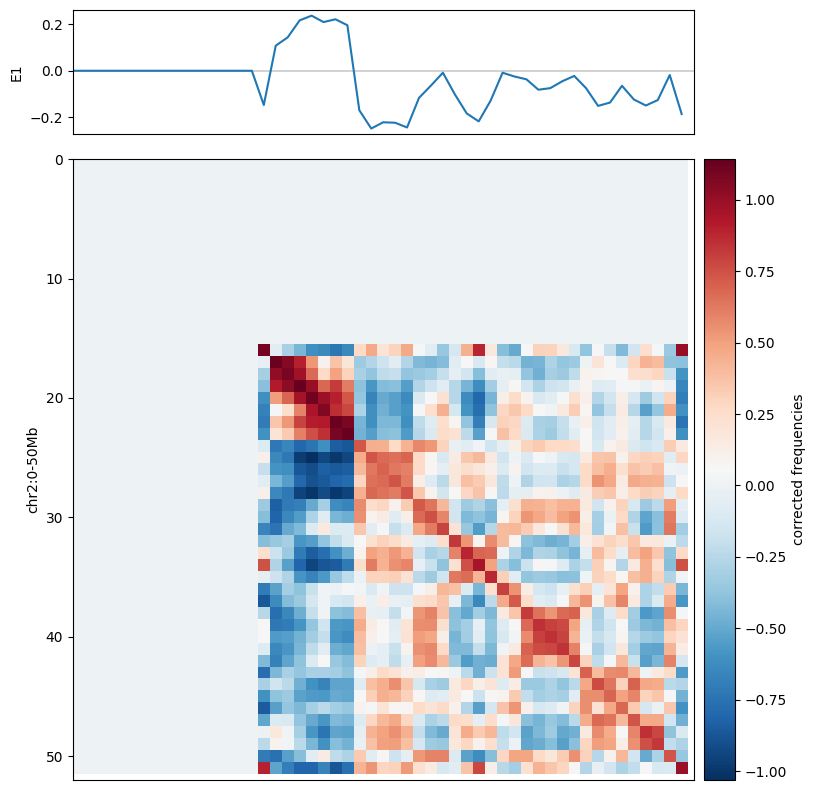

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax = plt.subplots(
    figsize=(15, 10),
)

im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)
plt.axis([0,len(approx_np),len(approx_np),0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr2:0-50Mb')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
ax1.plot([0,len(approx_np)],[0,0],'k',lw=0.25)
ax1.plot(approx_np, label='E1')

ax1.set_ylabel('E1')
ax1.set_xticks([])